# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Define empty lists to store the values
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temperature = []
wind_speed = []
city_name = []

# Looping through cities to make api calls using the city as the query
i = 1
for city in cities:
    city = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
# Extract the data. Missing data is excluded  
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        max_temperature.append(response["main"]['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. Next Query.")

Processing record 1|east london
Processing record 2|eureka
Processing record 3|poum
City not found. Next Query.
Processing record 4|rikitea
Processing record 5|roma
Processing record 6|busselton
Processing record 7|ponta do sol
Processing record 8|cabra
Processing record 9|coihaique
Processing record 10|quelimane
Processing record 11|chuy
Processing record 12|yellowknife
Processing record 13|hermanus
City not found. Next Query.
Processing record 14|kapaa
Processing record 15|te anau
Processing record 16|cidreira
Processing record 17|christchurch
Processing record 18|jamestown
City not found. Next Query.
Processing record 19|rudnichnyy
Processing record 20|faya
Processing record 21|miracema do tocantins
Processing record 22|vaini
Processing record 23|yagodnoye
Processing record 24|cape town
Processing record 25|leningradskiy
Processing record 26|new norfolk
Processing record 27|baykit
Processing record 28|hilo
Processing record 29|harnosand
Processing record 30|ilulissat
Processing reco

Processing record 240|hofn
Processing record 241|gojra
Processing record 242|atherton
Processing record 243|bireun
City not found. Next Query.
Processing record 244|grand gaube
Processing record 245|meulaboh
Processing record 246|kapit
Processing record 247|okhotsk
Processing record 248|cabo san lucas
Processing record 249|aqtobe
Processing record 250|tura
Processing record 251|canto do buriti
Processing record 252|yakeshi
Processing record 253|kokkola
Processing record 254|panjakent
Processing record 255|angren
Processing record 256|linxia
Processing record 257|marfino
Processing record 258|tupancireta
Processing record 259|coahuayana
Processing record 260|charters towers
Processing record 261|barnala
Processing record 262|lins
Processing record 263|talnakh
Processing record 264|katsuura
Processing record 265|verkhoyansk
Processing record 266|andalan
Processing record 267|artvin
Processing record 268|nanakuli
City not found. Next Query.
Processing record 269|koutsouras
Processing reco

Processing record 484|zemetchino
Processing record 485|chaibasa
Processing record 486|ucluelet
Processing record 487|minsk
Processing record 488|makakilo city
Processing record 489|lokachi
Processing record 490|matabungkay
Processing record 491|husavik
Processing record 492|handlova
Processing record 493|nianzishan
Processing record 494|tazovskiy
Processing record 495|imbituba
Processing record 496|tilichiki
Processing record 497|sungaipenuh
Processing record 498|margate
Processing record 499|ortigueira
Processing record 500|sao domingos
Processing record 501|sangar
Processing record 502|sibolga
Processing record 503|nuuk
City not found. Next Query.
City not found. Next Query.
City not found. Next Query.
Processing record 504|yunyang
Processing record 505|hualmay
Processing record 506|aitape
Processing record 507|auch
Processing record 508|las choapas
Processing record 509|vanavara
Processing record 510|tevaitoa
Processing record 511|roanoke rapids
Processing record 512|robertsport
Cit

+### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create city dataframe
city_df = pd.DataFrame({"City": city_name, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity": humidity,
                        "Latitude": lat,
                        "Longitude": lng,
                        "Max Temperature": max_temperature,
                        "Wind Speed": wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

# Export data to csv
city_df.to_csv("../output_file/city.csv")

# Display dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
City ID,,,,,,,,,
0,East London,12,ZA,1621375736,34,-33.0153,27.9116,66.07,6.87
1,Eureka,90,US,1621375802,70,40.8021,-124.1637,65.68,10.00
2,Poum,99,NC,1621375802,72,-20.2333,164.0167,75.36,10.94
3,Rikitea,67,PF,1621375803,68,-23.1203,-134.9692,74.57,18.05
4,Rome,75,US,1621375597,33,43.2128,-75.4557,78.66,13.80


In [5]:
city_df.count()

City               569
Cloudiness         569
Country            569
Date               569
Humidity           569
Latitude           569
Longitude          569
Max Temperature    569
Wind Speed         569
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.

# Skipped?

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Skipped?

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

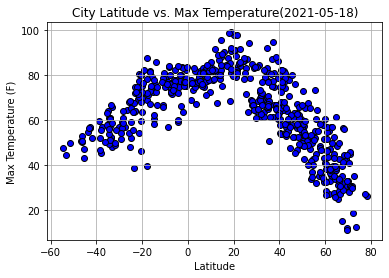

In [8]:
# Convert date for plot
time_stamp = city_df["Date"][0]
changed_time_stamp = datetime.utcfromtimestamp(time_stamp)
simple_time_stamp = datetime.date(changed_time_stamp)

# Create plot
plt.scatter(city_df["Latitude"], city_df["Max Temperature"], marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({simple_time_stamp})")
plt.savefig("../output_file/Latitude_vs_temperature_plot")
plt.show()

## Latitude vs. Humidity Plot

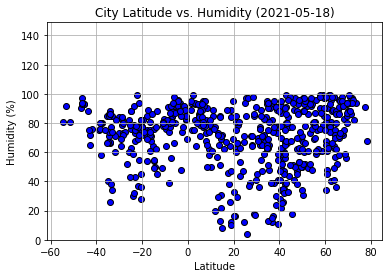

In [9]:
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({simple_time_stamp})")
plt.savefig("../output_file/Latitude_vs_Humidity_plot")
plt.show()

## Latitude vs. Cloudiness Plot

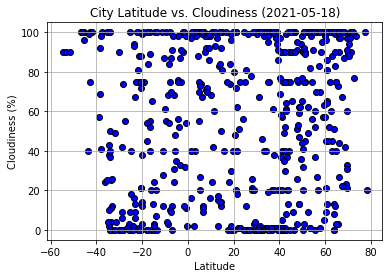

In [10]:
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({simple_time_stamp})")
plt.savefig("../output_file/Latitude_vs_Cloudiness_plot")
plt.show()

## Latitude vs. Wind Speed Plot

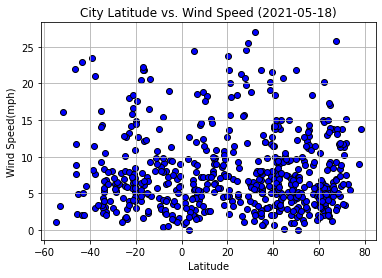

In [11]:
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({simple_time_stamp})")
plt.savefig("../output_file/Latitude_vs_WindSpeed_plot")
plt.show()

## Linear Regression

In [12]:
# Add the linear regression equation and line
def linear_reg_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.median(), y_values.median()), fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create Northern and Southern Hemisphere Dataframes
Northern_hemisphere = city_df.loc[city_df["Latitude"]>0]
Southern_hemisphere = city_df.loc[city_df["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8320208995874824


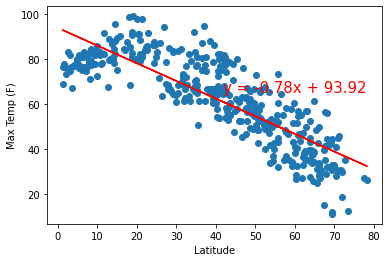

None


In [14]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Max Temperature"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values, y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7502684180104596


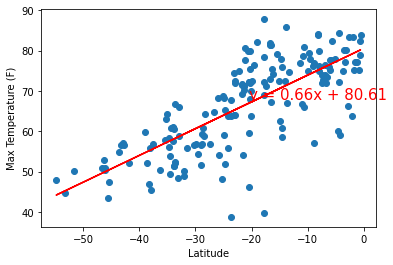

None


In [15]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Max Temperature"]
plt.ylabel("Max Temperature (F)")
print(linear_reg_plot(x_values, y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1522931021787771


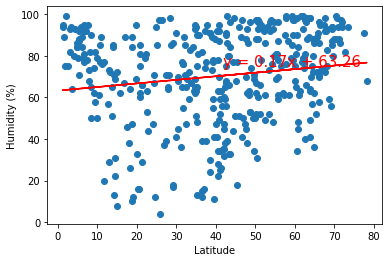

None


In [16]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values, y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07331454373466559


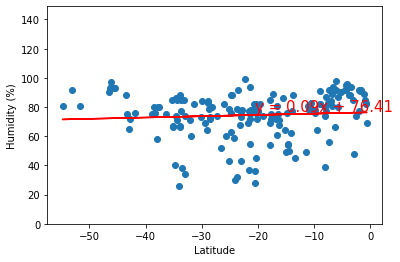

None


In [17]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max() + 50)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values, y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08125169511433901


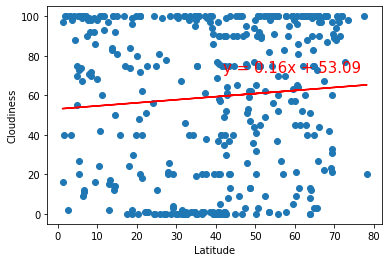

None


In [18]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values, y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.043750334510285864


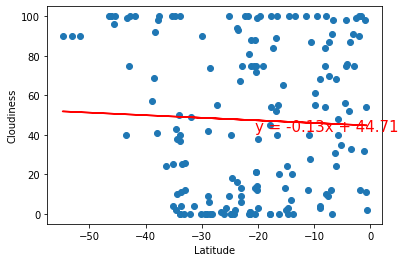

None


In [19]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values, y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.023242010341120892


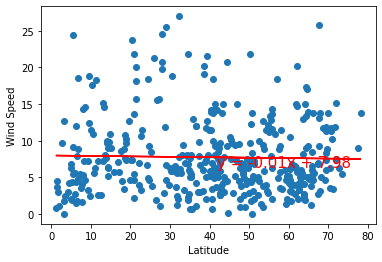

None


In [20]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values, y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08038505086021332


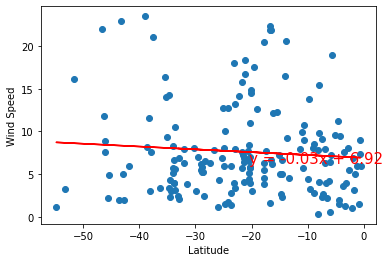

None


In [21]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values, y_values))